#Heart Disease Detection

##Importing essential Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading The Dtaset

In [3]:
df=pd.read_csv('./heart.csv')

Exploring the data

In [4]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
print(df.tail(10))

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1015   58    1   0       128   216    0        0      131      1      2.2   
1016   65    1   3       138   282    1        0      174      0      1.4   
1017   53    1   0       123   282    0        1       95      1      2.0   
1018   41    1   0       110   172    0        0      158      0      0.0   
1019   47    1   0       112   204    0        1      143      0      0.1   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1015      1   3     3       0  
1016      1   1     2       0  
1017      1   2     3       0  
1018      2   0     3   

#Features


1.   Age
2.   Sex
3.   chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise
    relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect





Size and the shape of the data

In [6]:
df.shape

(1025, 14)

Essential Values of the dataset

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Check for missing Values

In [ ]:
missing_count = df.isnull().sum()
print(missing_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


##So there is no missing Values in this dataset

Checking Unique values of each variable

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

##So we can see that

* sex, cp, fbs, restecg, exang, slope, ca, thal are **Categorical variables**
* age, trestbps, chol, thalach, oldpeak are **Numerical Variables**

Counts of categorical variables

In [ ]:
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

for t in categorical_variables:
  print(df[t].value_counts().reset_index(name='Count'))
  print()


   sex  Count
0    1    713
1    0    312

   cp  Count
0   0    497
1   2    284
2   1    167
3   3     77

   fbs  Count
0    0    872
1    1    153

   restecg  Count
0        1    513
1        0    497
2        2     15

   exang  Count
0      0    680
1      1    345

   slope  Count
0      1    482
1      2    469
2      0     74

   thal  Count
0     2    544
1     3    410
2     1     64
3     0      7

   ca  Count
0   0    578
1   1    226
2   2    134
3   3     69
4   4     18



#Data visualization for Numerical Variables

In [ ]:
numeric_columns = ['age','trestbps','chol','thalach','oldpeak']

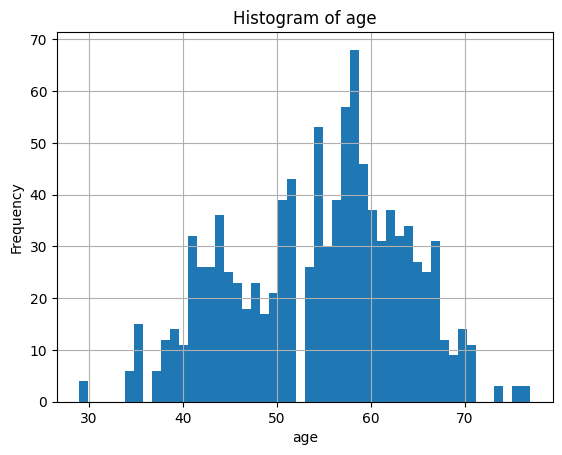

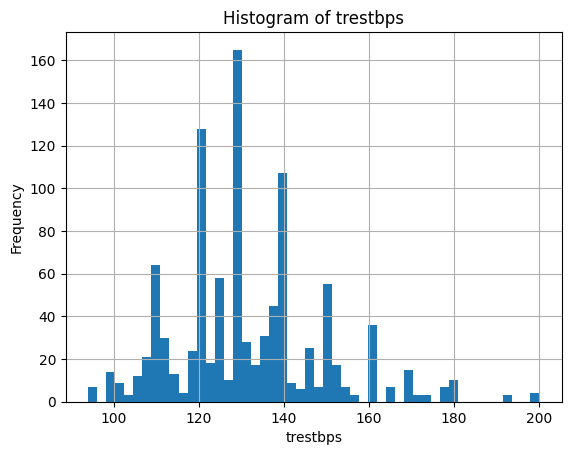

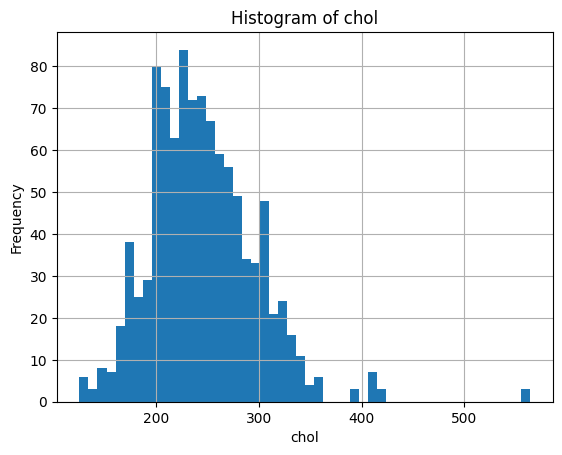

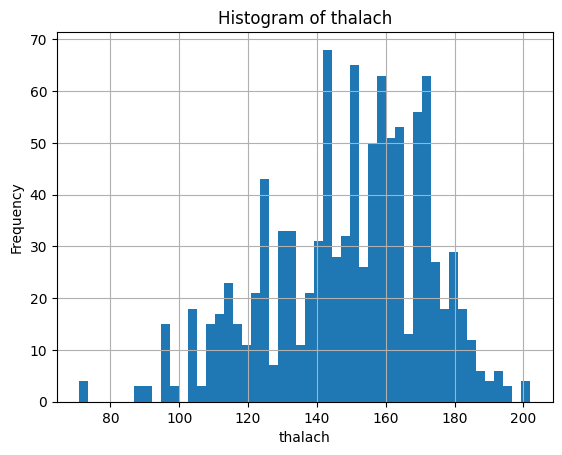

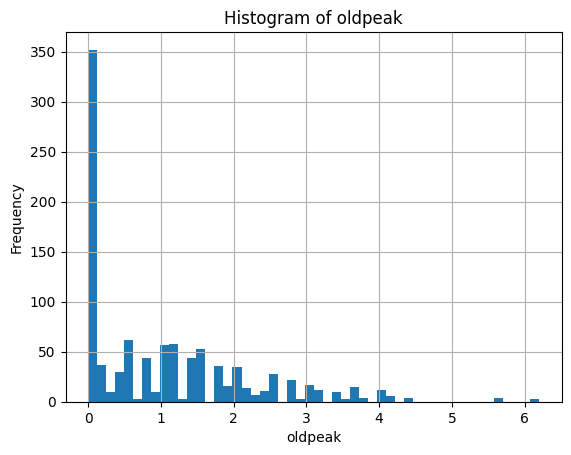

In [ ]:
for numeric_Val in numeric_columns:
    plt.figure()
    df[numeric_Val].hist(bins=50)
    plt.title("Histogram of " + numeric_Val)
    plt.xlabel(numeric_Val)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


##By seeing those plot we can see that there are some outliers in some varibles.
These outliers may lead our model to bad predictions,So its better to get rid of them before continuing to modelling


##Correlation Matrix

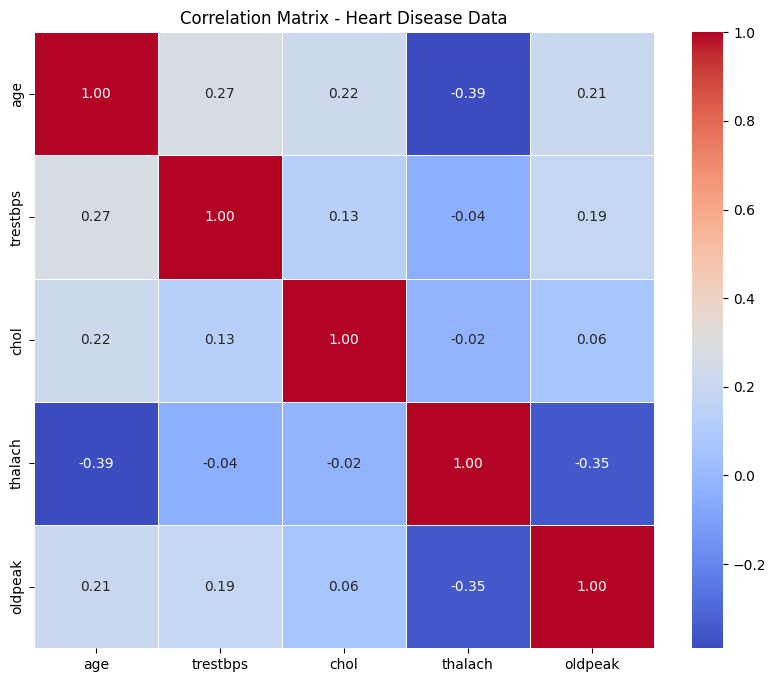

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numeric columns
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Assuming your DataFrame representing heart disease data is named heart_disease_df
correlation_matrix_heart = df[numeric_columns].corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_heart, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Heart Disease Data')
plt.savefig('heart_disease_correlation_mat.png')
plt.show()


Text(0.5, 0, '% target')

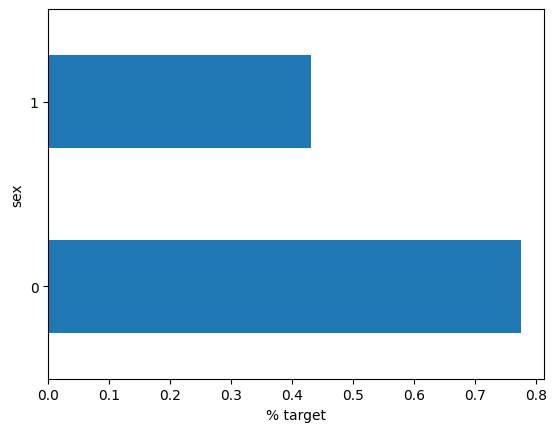

In [ ]:
pd.concat([dfTrain, y_Train], axis=1).groupby('sex').target.mean().plot(kind='barh').set_xlabel('% target')


* This means most males are subjected to the heart disease than the femal patients


<Axes: xlabel='cp'>

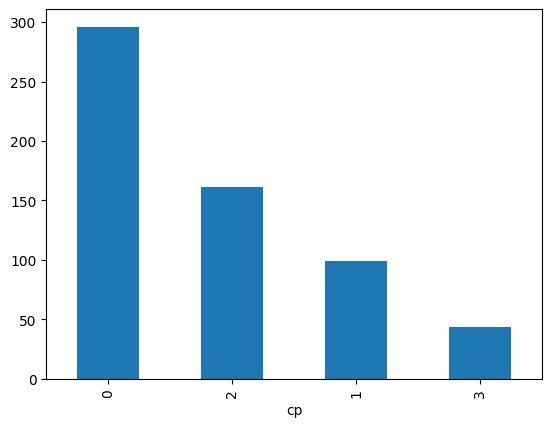

In [ ]:
dfTrain.cp.value_counts().plot(kind='bar')

In [ ]:
df.loc[1022]

age          57.0
sex           1.0
cp            0.0
trestbps    165.0
chol        289.0
fbs           1.0
restecg       0.0
thalach     124.0
exang         0.0
oldpeak       1.0
slope         1.0
ca            3.0
thal          3.0
target        0.0
Name: 1022, dtype: float64

In [ ]:
df.loc[1021]

age          62.0
sex           0.0
cp            0.0
trestbps    124.0
chol        209.0
fbs           0.0
restecg       1.0
thalach     163.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 1021, dtype: float64

##checking for duplicates

In [ ]:
duplicates = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicates)

# Check which rows are the original and which are duplicates
original_rows = df[~df.duplicated()]
print("\nOriginal Rows:")
print(original_rows)


Duplicate Rows:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
12     55    0   0       128   205    0        2      130      1      2.0   
18     59    1   3       134   204    0        1      162      0      0.8   
27     65    1   0       120   177    0        1      140      0      0.4   
44     50    0   2       120   219    0        1      158      0      1.6   
54     52    1   0       112   230    0        1      160      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   44    0   2       108   141    0        1      175      0      0.6   
1021   62    0   0       124   209    0        1      163      0      0.0   
1022   57    1   0       165   289    1        0      124      0      1.0   
1023   57    1   0       110   335    0        1      143      1      3.0   
1024   53    1   0       142   226    0        0      111      1      0.0   

      slope  ca  thal  target  
12        1   1     3      

In [ ]:
#Feature Exploration
sex_count=df['sex'].value_counts().reset_index(name='Count')
sex_count

,sex,Count
0,1,713
1,0,312


Text(0.5, 0, '% target')

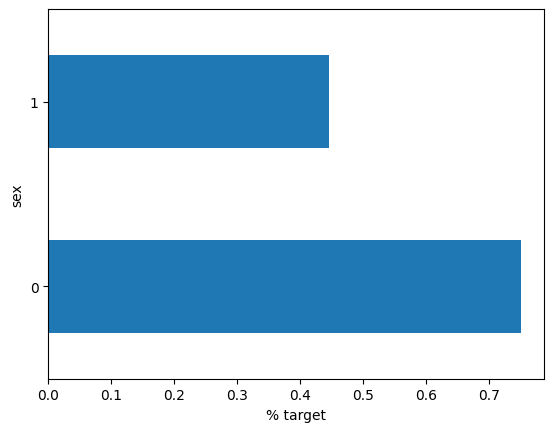

In [ ]:
df1.groupby('sex')['target'].mean().plot(kind='barh').set_xlabel('% target')

In [ ]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
#Train size nd the test size
train_size = 600
test_size = 200

#Splitting the dataset in to train test and validate sets
dfTrain = df.iloc[:train_size]
dfTest = df.iloc[train_size:train_size+test_size]
dfValidate = df.iloc[train_size+test_size:]

#Making the labels for training
y_Train = dfTrain.pop('target')
y_Test = dfTest.pop('target')
y_Validate = dfValidate.pop('target')

In [ ]:
grouped_data = pd.concat([dfTrain, y_Train], axis=1).groupby('sex')
print(pd.concat([dfTrain, y_Train], axis=1).groupby('sex').target.mean())
for group_name, group_data in grouped_data:
    print("Group:", group_name)
    print(group_data)


<Axes: >

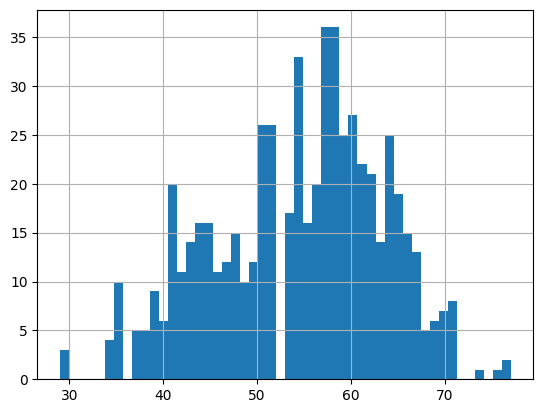

In [ ]:
dfTrain.age.hist(bins=50)

In [ ]:
grouped_mean = pd.concat([dfTrain, y_Train], axis=1).groupby('sex')['target'].mean()
print(grouped_mean)


sex
0    0.774725
1    0.430622
Name: target, dtype: float64


<Axes: ylabel='sex'>

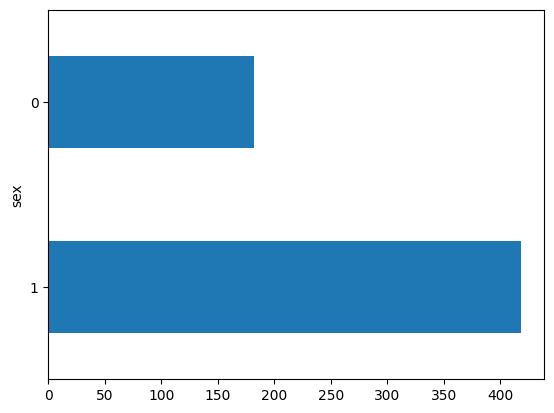

In [ ]:
dfTrain.sex.value_counts().plot(kind='barh')